In [1]:
'''
这个文件暂时没用
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import time
import tqdm
import math

In [4]:
from models.RNN import RNN, LSTM, GRU
from models.CNN import CNN, TCN
from models.MLP import MLP
from models.transformer import Transformer, iTransformer, PatchTST
from models.Linear import LLinear, DLinear, NLinear
from models.stat import Identical, ExponentialMovingAverage, SVR

# 超参数
num_epochs = 10  # 训练的轮数
learning_rate = 0.001 # 学习率
num_samples = 10000  # 样本总数
input_len = 64  # 输入长度
output_len = 16  # 输出长度
input_channels = 13  # 输入通道数
output_channels = 13  # 输出通道数
batch_size = 64  # 批大小
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 实例化模型、损失函数、评估函数和优化器
MODEL = Transformer(input_len=input_len, output_len=output_len, input_channels=input_channels, output_channels=output_channels)
loss_func = nn.MSELoss() # MSE，用于拟合
metric_func=nn.L1Loss() # MAE，用于评估
optimizer = optim.Adam(MODEL.parameters(), lr=learning_rate)
sum(p.numel() for p in MODEL.parameters())

524893

In [5]:
import mydatasets
import random
# 加载测试数据集（自己生成的模拟数据）
X, Y = mydatasets.load_test_data(id='2',
                                input_dim=(num_samples, input_len, input_channels),
                                output_dim=(num_samples, output_len, output_channels),
                                noise=0.2)
print('X shape:', X.shape)
print('Y shape:', Y.shape)
train_loader, val_loader, test_loader = mydatasets.get_XY_loaders(X, Y, batch_size=batch_size)

X shape: (10000, 64, 13)
Y shape: (10000, 16, 13)
Train dataset size: X: (7000, 64, 13); Y: (7000, 16, 13)
Val dataset size: X: (1000, 64, 13); Y: (1000, 16, 13)
Test dataset size: X: (2000, 64, 13); Y: (2000, 16, 13)


In [6]:
from my_utils import train, plot_fit_history

fit_history=train(MODEL, train_loader, val_loader, optimizer, num_epochs=num_epochs)

  0%|          | 0/10 [00:07<?, ?it/s]


KeyboardInterrupt: 

In [7]:
print("Loss on test set: ", MODEL.evaluate(test_loader))

100%|██████████| 32/32 [00:00<00:00, 947.14it/s]

Loss on test set:  0.0677987345457077


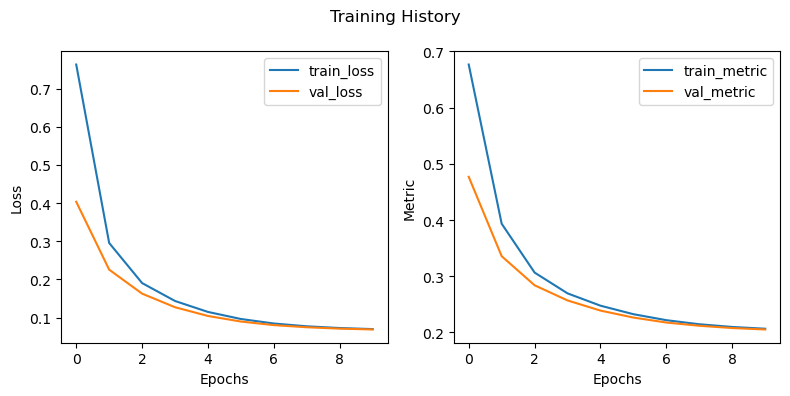

In [25]:
plot_fit_history(fit_history)